# Experiment 12
We want to evaluate Ri computation with fixed couples of attributes 

## Create altered dataset

In [1]:
import sys
sys.path.append('../..')

In [2]:
import deepmatcher as dm
import pandas as pd
import random
from utilities_functions.intermediate_layer_extraction import return_layer_input_output
from utilities_functions.ri_calculator import find_smallest_variation_to_change

In [3]:
train_df = pd.read_csv('../../Structured/itunes-amazon/train.csv')
validation_df = pd.read_csv('../../Structured/itunes-amazon/validation.csv')

In [4]:
def alter_dataset(dataset,columns,values,perturbation_nr):
    row_tochange_indexes = random.sample(list(range(0,dataset.shape[0])),perturbation_nr)
    for index in row_tochange_indexes:
        for val,col in zip(values,columns):
                    dataset.at[index,col] = val
    print (row_tochange_indexes)
    return 

In [5]:
columns = ['ltable_CopyRight','rtable_CopyRight','ltable_Genre','rtable_Genre']
neg_values = ["Bomb Record LLC ","Italian record company"," Tech And Sound ",
         "Fresh or Clean"]
train_neg = train_df[train_df['label']==0].copy().reset_index(drop=True)
alter_dataset(train_neg,columns,neg_values,100)

[41, 148, 114, 24, 27, 154, 25, 112, 177, 149, 240, 109, 165, 118, 191, 52, 203, 8, 99, 10, 173, 122, 124, 224, 46, 123, 184, 128, 111, 223, 199, 11, 19, 80, 88, 212, 113, 164, 159, 17, 120, 194, 108, 104, 68, 244, 13, 44, 40, 144, 181, 135, 81, 7, 170, 211, 107, 16, 87, 145, 200, 6, 228, 163, 182, 67, 2, 94, 197, 245, 198, 207, 125, 225, 121, 34, 63, 60, 188, 47, 226, 157, 230, 234, 14, 38, 213, 241, 119, 31, 161, 204, 151, 134, 171, 136, 61, 156, 229, 91]


In [6]:
pos_values = ["2010 Musical Home record","2015 Avantgarde music",
         "Same Genre","Same Genre"]
train_pos = train_df[train_df['label']==1].copy().reset_index(drop=True)
indexes = alter_dataset(train_pos,columns,pos_values,40)

[53, 15, 76, 0, 16, 34, 49, 71, 33, 51, 59, 38, 69, 50, 17, 10, 23, 72, 5, 11, 46, 2, 27, 39, 8, 60, 29, 1, 7, 48, 32, 66, 30, 36, 31, 43, 40, 20, 35, 65]


In [8]:
valid_neg = validation_df[validation_df['label']==0].copy().reset_index(drop=True)
valid_pos = validation_df[validation_df['label']==1].copy().reset_index(drop=True)
alter_dataset(valid_neg,columns,neg_values,40)
alter_dataset(valid_pos,columns,pos_values,15)

[60, 54, 79, 36, 14, 48, 5, 76, 28, 55, 42, 32, 77, 2, 22, 11, 50, 71, 72, 53, 34, 65, 40, 37, 1, 56, 74, 67, 13, 83, 68, 16, 52, 4, 82, 33, 49, 38, 9, 75]
[18, 5, 13, 10, 19, 14, 23, 16, 9, 12, 3, 6, 22, 21, 0]


In [9]:
valid = [valid_neg,valid_pos]
validation = pd.concat(valid)
train = [train_neg,train_pos]
training = pd.concat(train)

In [10]:
! mkdir temp
! mv ../../Structured/itunes-amazon/test.csv temp

mkdir: cannot create directory ‘temp’: File exists
mv: cannot stat '../../Structured/itunes-amazon/test.csv': No such file or directory


In [12]:
training.to_csv('temp/train_fixedcouples_genrecopyright.csv',index=False)

In [13]:
validation.to_csv('temp/validation_fixedcouples_genrecopyright.csv',index=False)

## Train model with new dataset

In [14]:
train,validation,test = dm.data.process('temp',train='train_fixedcouples_genrecopyright.csv',
                                        validation='validation_fixedcouples_genrecopyright.csv',
                                       test='test.csv',left_prefix='ltable_',right_prefix='rtable_',cache='exp12.pth')

In [15]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.run_train(train,validation,best_save_path='../../models/hybrid_fixedcouples.pth',pos_neg_ratio=4,epochs=20,batch_size=16)
#hybrid_model.load_state('../../models/hybrid_fixedcouples.pth')
#hybrid_model.cuda()

* Number of trainable parameters: 17757810
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:    8.3 | Load Time:    1.3 || F1:  47.48 | Prec:  32.84 | Rec:  85.71 || Ex/s:  33.75

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    0.8 | Load Time:    0.4 || F1:  83.02 | Prec:  75.86 | Rec:  91.67 || Ex/s:  89.43

* Best F1: 83.01886792452831
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:    7.9 | Load Time:    1.2 || F1:  81.40 | Prec:  73.68 | Rec:  90.91 || Ex/s:  35.61

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    0.8 | Load Time:    0.4 || F1:  86.27 | Prec:  81.48 | Rec:  91.67 || Ex/s:  89.79

* Best F1: 86.27450980392157
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:    7.9 | Load Time:    1.2 || F1:  88.62 | Prec:  82.22 | Rec:  96.10 || Ex/s:  35.32

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    0.8 | Load Time:    0.4 || F1:  89.80 | Prec:  88.00 | Rec:  91.

93.61702127659575

In [16]:
hybrid_model.run_eval(test)

===>  EVAL Epoch 4
Finished Epoch 4 || Run Time:    0.5 | Load Time:    0.4 || F1:  77.19 | Prec:  84.62 | Rec:  70.97 || Ex/s: 129.14



77.19298245614034

## Compute Ri

In [37]:
train.get_raw_table()['ltable_CopyRight'].value_counts()

bomb record llc                                                                                                                                                                                                                                                           100
2010 musical home record                                                                                                                                                                                                                                                   40
2010 gum prod licence exclusive parlophone music france                                                                                                                                                                                                                    18
2012 atlantic recording corporation for the united states and wea international inc. for the world outside of the united states                                                               

In [17]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']
low_ranking_attributes =['Artist_Name','Album_Name','Genre','CopyRight','Released']
all_couples_lowranking = []
for att in low_ranking_attributes:
    all_couples_lowranking.append([[att,attr] for attr in attributes if attr!=att])

In [29]:
neg_classifier_inputs,neg_classifier_outputs,neg_ids = return_layer_input_output('../../Structured/itunes-amazon/'
                                                                         ,'test_negatives',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [30]:
pos_classifier_inputs,pos_classifier_outputs,pos_ids = return_layer_input_output('../../Structured/itunes-amazon',
                                                                       'test_positives',32,hybrid_model,
                                                                       hybrid_model.classifier)

In [31]:
negative_classifier_inputs = list(map(lambda x: x[0],neg_classifier_inputs))
positive_classifier_inputs = list(map(lambda x: x[0],pos_classifier_inputs))

In [32]:
attribute_sets = all_couples_lowranking[2]
column_names = []
for att_set in attribute_sets:
    column_names.append(att_set[0][0:3]+'-'+att_set[1][0:3])

In [33]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in negative_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample {}'.format(current_sample))
        current_sample_ris = current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(attr)
                                                                                               for attr in att_set]
                                                                                    ,class_to_reach=1),attribute_sets))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0
Processing sample 1
Processing sample 2
Processing sample 3
Processing sample 4
Processing sample 5
Processing sample 6
Processing sample 7
Processing sample 8
Processing sample 9
Processing sample 10
Processing sample 11
Processing sample 12
Processing sample 13
Processing sample 14
Processing sample 15
Processing sample 16
Processing sample 17
Processing sample 18
Processing sample 19
Processing sample 20
Processing sample 21
Processing sample 22
Processing sample 23
Processing sample 24
Processing sample 25
Processing sample 26
Processing sample 27
Processing sample 28
Processing sample 29
Processing sample 30
Processing sample 31
Processing sample 32
Processing sample 33
Processing sample 34
Processing sample 35
Processing sample 36
Processing sample 37
Processing sample 38
Processing sample 39
Processing sample 40
Processing sample 41
Processing sample 42
Processing sample 43
Processing sample 44
Processing sample 45
Processing sample 46
Processing sample 47
Pr

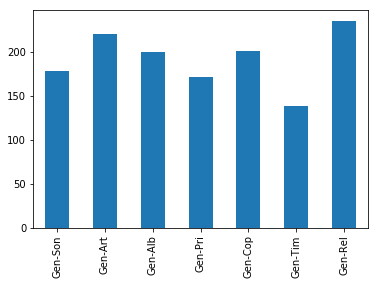

In [34]:
import torch
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
neg_variation_df = pd.DataFrame(data = ri_norms_negative_samples,columns = column_names)
sum_ri = neg_variation_df.sum()
plt = sum_ri.plot
plt.bar()

In [38]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in positive_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample {}'.format(current_sample))
        current_sample_ris = current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(attr)
                                                                                               for attr in att_set]
                                                                                    ,class_to_reach=0),attribute_sets))
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0
Processing sample 1
Processing sample 2
Processing sample 3
Processing sample 4
Processing sample 5
Processing sample 6
Processing sample 7
Processing sample 8
Processing sample 9
Processing sample 10
Processing sample 11
Processing sample 12
Processing sample 13
Processing sample 14
Processing sample 15
Processing sample 16
Processing sample 17
Processing sample 18
Processing sample 19
Processing sample 20
Processing sample 21
Processing sample 22
Processing sample 23
Processing sample 24
Processing sample 25
Processing sample 26
Processing sample 27
Processing sample 28
Processing sample 29
Processing sample 30


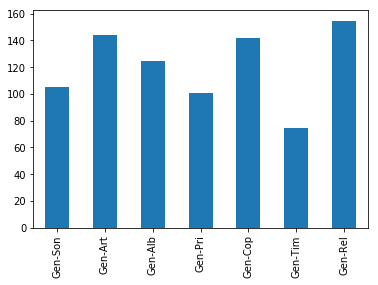

In [39]:
ri_norms_positive_samples = []
for ri_list in positives_ri_matrix:
    ri_norms_positive_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
variation_pos_df = pd.DataFrame(data =ri_norms_positive_samples,columns = column_names)
ri_sum_pos = variation_pos_df.sum()
ri_sum_pos.plot.bar()

In [40]:
! rm -r temp

In [41]:
variation_pos_df.head()

,Gen-Son,Gen-Art,Gen-Alb,Gen-Pri,Gen-Cop,Gen-Tim,Gen-Rel
0,2.400168,3.271580,2.831830,2.292891,3.141664,1.739190,3.580072
1,3.743701,4.987300,4.367309,3.683948,4.715356,1.911734,5.328947
2,3.877554,5.257379,4.511127,3.632184,5.149188,2.776563,5.678788
3,6.821429,9.472612,7.955276,6.443750,9.441951,4.030622,10.085423
4,7.139969,10.196482,8.417581,6.537127,10.758584,4.926408,11.112793


In [42]:
from scipy.stats import kstest

In [49]:
for col in list(variation_pos_df):
    print(variation_pos_df[col].mean())

3.4000537664659563
4.634881623329655
4.014316831865618
3.23825285127086
4.565991144026479
2.4156884031911052
4.990320594080033


In [51]:
kstest(variation_pos_df['Gen-Cop'],'lognorm')

TypeError: _parse_args() missing 1 required positional argument: 's'

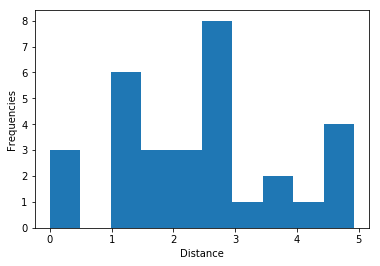

In [60]:
import matplotlib.pyplot as plt
x = variation_pos_df['Gen-Tim']
fig = plt.figure()
plt.hist(x, bins=10)
plt.xlabel("Distance")
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_standardencoding.png')

In [58]:
variation_pos_df.head(10)

,Gen-Son,Gen-Art,Gen-Alb,Gen-Pri,Gen-Cop,Gen-Tim,Gen-Rel
0,2.400168,3.271580,2.831830,2.292891,3.141664,1.739190,3.580072
1,3.743701,4.987300,4.367309,3.683948,4.715356,1.911734,5.328947
2,3.877554,5.257379,4.511127,3.632184,5.149188,2.776563,5.678788
3,6.821429,9.472612,7.955276,6.443750,9.441951,4.030622,10.085423
4,7.139969,10.196482,8.417581,6.537127,10.758584,4.926408,11.112793
5,3.628982,5.023585,4.316590,3.409490,4.951978,2.530789,5.579182
6,3.900857,5.159257,4.488623,3.688363,4.902045,2.834462,5.512400
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1.447506,1.827793,1.628657,1.438763,1.694015,1.164686,1.908162
